<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autorch >log.txt

In [2]:
import pandas as pd
import joblib
import autorch
from torch import nn#
from torch.optim import Adam
max_epochs = 100

# c620 模擬數據

  0%|          | 0/100 [00:00<?, ?it/s]

dict_keys(['x41', 'case', 'yRefluxRate', 'yControl', 'yHeatDuty', 'vent_gas_x', 'distillate_x', 'sidedraw_x', 'bottoms_x', 'vent_gas_sf', 'distillate_sf', 'sidedraw_sf', 'bottoms_sf', 'density'])


  1%|          | 1/100 [00:00<00:46,  2.14it/s]

epoch:0 train_loss:0.0098 valid_loss:0.0034


 51%|█████     | 51/100 [00:11<00:10,  4.46it/s]

epoch:50 train_loss:0.0033 valid_loss:0.0035


100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


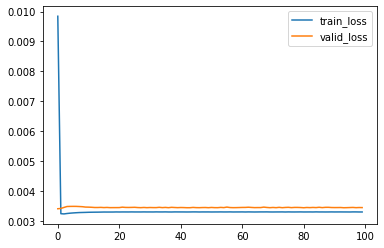

In [3]:
# load data
c620_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c620_train.csv',index_col=0)
c620_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c620_col_names.pkl')
print(c.keys())
# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c620_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['vent_gas_sf']+c['distillate_sf']+c['sidedraw_sf']+c['bottoms_sf']
n_idx = [[i,i+41,i+41*2,i+41*3] for i in range(41)]

# modeling
c620_model = autorch.utils.PartBulider(c620_df,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs)
c620_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c620_model.optimizer = Adam(c620_model.net.parameters(),lr=0.01)
c620_model.train()

In [4]:
# test
c620_model.test(e=0.02)

,R2,MSE,MAPE
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,0,1.41574e-05,0.287359
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,0.960363,9.82748e-07,0.0633085
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,0.944629,3.33788e-05,0.284815
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,0.974034,0.000109737,0.684115
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,0.889364,0.00199845,4.62444
...,...,...,...
Density_Bottoms Production Rate and Composition,0.998423,2.65017e-11,0.000469604
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0.990946,1.21388,0.680354
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.953215,0.0615909,0.132481
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.995859,0.00321542,0.0250153


# c620遷移學習

In [5]:
# use pretrain net continue training
from copy import deepcopy
pretrain_net = deepcopy(c620_model.net.train())
print(pretrain_net)

Linear(in_features=44, out_features=172, bias=True)


In [6]:
c620_model = autorch.utils.PartBulider(c620_df_real,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c620_model.net = pretrain_net # use pretrain net
c620_model.optimizer = Adam(c620_model.net.parameters())

 26%|██▌       | 26/100 [00:00<00:00, 252.23it/s]

epoch:0 train_loss:0.0564 valid_loss:0.0485


 54%|█████▍    | 54/100 [00:00<00:00, 257.83it/s]

epoch:50 train_loss:0.0107 valid_loss:0.0109


100%|██████████| 100/100 [00:00<00:00, 273.66it/s]


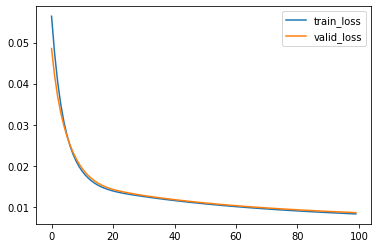

In [7]:
c620_model.train()

In [8]:
# test
c620_model.test(e=0.02)

,R2,MSE,MAPE
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,0,0.00153543,2.83703
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,0,0.0360416,15.5166
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,0,0.200352,43.8991
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,0,0.272542,51.8891
Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,0,0.299446,53.6614
...,...,...,...
Density_Bottoms Production Rate and Composition,0.571841,3.28896e-07,0.0598801
Tatoray Stripper C620 Operation_Yield Summary_Reflux Rate_m3/hr,0,31.7546,3.5346
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 14 (Control)_oC,0.146622,3.11549,0.953453
Tatoray Stripper C620 Operation_Column Temp Profile_C620 Tray 34 (Control)_oC,0.0341326,1.74247,0.488561


In [9]:
# save
joblib.dump(c620_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c620_real_data_linear.pkl']

# c660 模擬數據

  1%|          | 1/100 [00:00<00:21,  4.53it/s]

epoch:0 train_loss:0.0202 valid_loss:0.0079


 51%|█████     | 51/100 [00:11<00:10,  4.52it/s]

epoch:50 train_loss:0.0019 valid_loss:0.0019


100%|██████████| 100/100 [00:22<00:00,  4.52it/s]


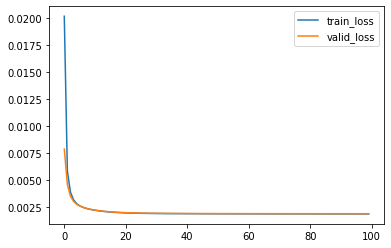

In [10]:
# load data
c660_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c660_train.csv',index_col=0)
c660_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c660_col_names.pkl')

# def col
x_col = c['case']+c['x41']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c660_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['vent_gas_sf']+c['distillate_sf']+c['sidedraw_sf']+c['bottoms_sf']
n_idx = [[i,i+41,i+41*2,i+41*3] for i in range(41)]

# modeling
c660_model = autorch.utils.PartBulider(c660_df,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs)
c660_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c660_model.optimizer = Adam(c660_model.net.parameters())
c660_model.train()

In [11]:
c660_model.test(e=0.02)

,R2,MSE,MAPE
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Hydrogen_Fraction,0,1.31378e-07,0.032874
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Methane_Fraction,0.695172,0.00615367,8.11655
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Ethane_Fraction,0.910632,0.00620762,17.5755
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_Propane_Fraction,0.975557,0.0022459,15.6685
Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Vent Gas_n-Butane_Fraction,0.967328,0.00223521,23.836
...,...,...,...
Density_Bottoms Production Rate and Composition,0.992445,5.83532e-10,0.00211513
Benzene Column C660 Operation_Yield Summary_Reflux Rate_m3/hr,0.95556,37.1958,3.58115
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 6 (SD & Control)_oC,0.932662,0.00294067,0.048332
Benzene Column C660 Operation_Column Temp Profile_C660 Tray 23 (Control)_oC,0.897811,0.0834134,0.233481


# c660遷移學習

In [12]:
pretrain_net = deepcopy(c660_model.net.train())
print(pretrain_net)

Linear(in_features=43, out_features=172, bias=True)


In [13]:
c660_model = autorch.utils.PartBulider(c660_df_real,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c660_model.net = pretrain_net # use pretrain net
c660_model.optimizer = Adam(c660_model.net.parameters())

 28%|██▊       | 28/100 [00:00<00:00, 274.81it/s]

epoch:0 train_loss:0.0740 valid_loss:0.0714
epoch:50 train_loss:0.0097 valid_loss:0.0092


100%|██████████| 100/100 [00:00<00:00, 279.43it/s]


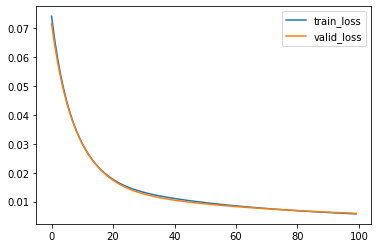

In [14]:
c660_model.train()

In [15]:
# save
joblib.dump(c660_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c660_real_data_linear.pkl']

# c670 模擬數據

In [16]:
# load data
import numpy as np
c670_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c670_train.csv',index_col=0)
c670_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c670_data.xlsx',index_col=0)
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c670_col_names.pkl')

In [17]:
# 根據條件修改值
def change_value(df):
  a = df[c['upper_bf']]
  紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
  紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
  紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
  紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
  df.loc[:,紫色零點零欄位] = 0.0001 
  df.loc[:,紫色零點一欄位] = 0.0001 
  df.loc[:,紫色零點九欄位] = 0.9999
  df.loc[:,紫色一點零欄位] = 0.9999
  return df

In [18]:
c670_df = change_value(c670_df)

In [19]:
c670_df_real = change_value(c670_df_real)

In [20]:
x_col = c['combined'] + c['upper_bf']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
op_col = c670_df_real[op_col].dropna(axis=1).columns.tolist()
sp_col = c['distillate_sf']+c['bottoms_sf']
n_idx = [[i,i+41] for i in range(41)]

In [21]:
c670_df_real[op_col].describe()

,Density_Distillate Production Rate and Composition,Density_Bottoms Production Rate and Composition,Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC
count,1.680000e+02,168.000000,168.000000,168.000000,168.000000
mean,8.710000e-01,0.875774,265.216376,182.680710,227.424409
std,4.454168e-16,0.000690,12.478253,1.163183,1.934246
min,8.710000e-01,0.871000,224.352644,180.619598,224.190414
25%,8.710000e-01,0.876000,259.429810,182.031650,226.409568
50%,8.710000e-01,0.876000,266.906257,182.582881,227.206541
75%,8.710000e-01,0.876000,273.278159,183.129631,227.827171
max,8.710000e-01,0.877000,294.282371,190.410732,239.521996


  1%|          | 1/100 [00:00<00:21,  4.71it/s]

epoch:0 train_loss:0.0192 valid_loss:0.0049


 51%|█████     | 51/100 [00:11<00:10,  4.57it/s]

epoch:50 train_loss:0.0023 valid_loss:0.0023


100%|██████████| 100/100 [00:22<00:00,  4.54it/s]


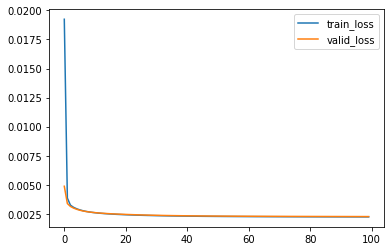

In [22]:
c670_model = autorch.utils.PartBulider(c670_df,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs)
c670_model.net = nn.Linear(len(x_col),len(sp_col)+len(op_col))
c670_model.optimizer = Adam(c670_model.net.parameters())
c670_model.train()

In [23]:
c670_model.test(e=0.02)

,R2,MSE,MAPE
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Hydrogen_Fraction,0,7.29234e-07,0.0767466
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methane_Fraction,1,0,0
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Ethane_Fraction,0,1.77717e-10,6.89897e-05
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Propane_Fraction,0,6.55704e-07,0.0622771
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Butane_Fraction,0,6.52858e-07,0.0601616
...,...,...,...
Density_Bottoms Production Rate and Composition,0.999857,2.66016e-11,0.000473664
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0.990036,6.04567,0.770274
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0.976412,0.00134672,0.0155413
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0.997345,0.00724319,0.0282864


# c670 遷移學習

In [24]:
pretrain_net = deepcopy(c670_model.net.train())
print(pretrain_net)

Linear(in_features=82, out_features=87, bias=True)


In [25]:
c670_model = autorch.utils.PartBulider(c670_df_real,x_col,sp_col+op_col,limit_y_range=True,normalize_idx_list=n_idx,max_epochs=max_epochs) # use real data  
c670_model.net = pretrain_net # use pretrain net
c670_model.optimizer = Adam(c670_model.net.parameters())

 53%|█████▎    | 53/100 [00:00<00:00, 259.31it/s]

epoch:0 train_loss:0.0879 valid_loss:0.0753
epoch:50 train_loss:0.0108 valid_loss:0.0109


100%|██████████| 100/100 [00:00<00:00, 262.70it/s]


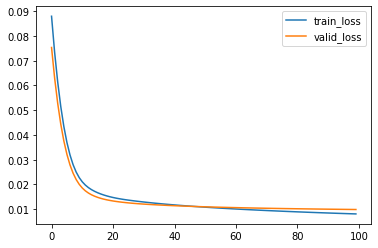

In [26]:
c670_model.train()

In [27]:
c670_model.test(e=0.02)

,R2,MSE,MAPE
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Hydrogen_Fraction,0,6.3211e-06,0.144402
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methane_Fraction,0,1.36724e-05,0.134925
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Ethane_Fraction,0,9.98384e-06,0.157664
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Propane_Fraction,0,3.02044e-05,0.33209
Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Butane_Fraction,0,6.94219e-05,0.368923
...,...,...,...
Density_Bottoms Production Rate and Composition,0,7.00811e-07,0.0648303
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0,134.204,3.75759
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0,3.01413,0.816357
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0.920295,0.788547,0.332068


In [30]:
c670_model.predict(c670_model.data['X_test'])[op_col].describe()

,Density_Distillate Production Rate and Composition,Density_Bottoms Production Rate and Composition,Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.895939,0.875691,263.103516,181.890533,227.438324
std,0.083926,0.001022,7.024906,1.701840,3.522879
min,0.719623,0.873396,255.331512,179.909927,224.861099
25%,0.847369,0.875400,258.312775,180.810059,225.835434
50%,0.895210,0.875668,261.882019,181.749817,226.715393
75%,0.964434,0.875771,263.732300,182.391983,227.091446
max,1.020351,0.878876,281.783661,186.299774,240.387054


In [31]:
joblib.dump(c670_model,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_real_data_linear.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670_real_data_linear.pkl']